In [1]:
import numpy
import pandas
import spacy
# local_files_only=False
nlp = spacy.load('ja_ginza_electra')

In [2]:
doc = nlp('銀座でランチをご一緒しましょう。')

for sent in doc.sents:
    n = len(sent)
    W = numpy.zeros((n, n))
    print(W.shape)
    for tkn in sent:
        print(tkn.i, tkn.orth_, tkn.tag_, tkn.dep_, tkn.head.orth_)
        if tkn.head.i != tkn.i:
            W[tkn.head.i, tkn.i] += 1
    break

(9, 9)
0 銀座 名詞-固有名詞-地名-一般 obl 一緒
1 で 助詞-格助詞 case 銀座
2 ランチ 名詞-普通名詞-一般 obj 一緒
3 を 助詞-格助詞 case ランチ
4 ご 接頭辞 compound 一緒
5 一緒 名詞-普通名詞-サ変可能 ROOT 一緒
6 し 動詞-非自立可能 aux 一緒
7 ましょう 助動詞 aux 一緒
8 。 補助記号-句点 punct 一緒


In [3]:
W

array([[0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 1., 0., 1., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [4]:
tokens = [tkn.orth_ for tkn in sent]


In [5]:
import networkx as nx
from matplotlib import pyplot


Duplicate key in file PosixPath('/usr/local/lib/python3.8/dist-packages/matplotlib/mpl-data/matplotlibrc'), line 767 ('font.family: IPAexGothic')
Duplicate key in file PosixPath('/usr/local/lib/python3.8/dist-packages/matplotlib/mpl-data/matplotlibrc'), line 768 (' font.family :Hiragino Kaku Gothic Pro')


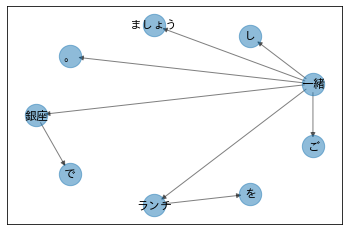

In [6]:
g = nx.from_numpy_matrix(W, create_using=nx.DiGraph)

# pos = nx.spring_layout(g)
pos = nx.shell_layout(g)
labels = {idx: tkn for idx, tkn in enumerate(tokens)}
nx.draw_networkx_edges(g, pos, width=1.0, alpha=0.5)
nx.draw_networkx_labels(g, pos, labels, font_size=12, font_family='IPAexGothic')
nx.draw_networkx_nodes(g, pos, node_size=500, alpha=0.5)

# nx.draw_networkx(g, font_family='IPAexGothic')
pyplot.show()

In [7]:
df_W = pandas.DataFrame(W, columns=tokens, index=tokens)
df_W

,銀座,で,ランチ,を,ご,一緒,し,ましょう,。
銀座,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
で,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ランチ,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
を,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ご,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
一緒,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0
し,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ましょう,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
。,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


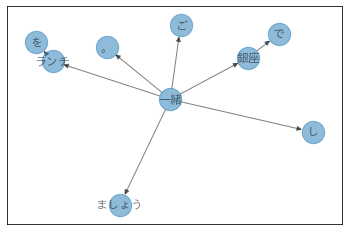

In [8]:
g = nx.from_pandas_adjacency(df_W, create_using=nx.DiGraph)
pos = nx.spring_layout(g)
# pos = nx.shell_layout(g)
# pos = nx.planar_layout(g)
# pos = nx.spectral_layout(g)
# pos = nx.spiral_layout(g)
# pos = nx.random_layout(g)
# pos = nx.circular_layout(g)
# pos = nx.kamada_kawai_layout(g)
params = dict(
    node_size=500,
    alpha=0.5,
)
nx.draw_networkx(g, pos=pos, font_family='IPAexGothic', **params)
pyplot.show()

In [9]:
from spacy import displacy
displacy.render(doc, style="dep", options={"compact":True})


In [10]:
import re

text = """本書は，「⁠ディープラーニング」の基本となる考え方から最新の発展までを，そのしくみや原理に従ってまとめた技術解説書です。

ディープラーニングは現在の「人工知能」（⁠AI）の発展の中核を担っており，さまざまなアプリケーションやサービスを通じて実用化が進むとともに，将来の人工知能の発展において重要な技術として研究開発が進められています。たとえば，ディープラーニングは画像認識や音声認識，自然言語処理（機械翻訳，質問応答⁠）⁠，ロボティクス，自動運転，材料探索，創薬，異常検知，最適化，プログラミング支援など，幅広い分野で大きな成果を挙げています。

人工知能の中でもデータから知識やルールを獲得するのが「機械学習」であり，機械学習の中でも層数が多く幅の広い「ニューラルネットワーク」と呼ばれるモデルを使うアプローチが「ディープラーニング」です。

ニューラルネットワークは単純な関数を大量に組み合わせていくことで複雑な関数を表現し，その実体は「関数の塊」のようなものです。各関数はパラメータで特徴づけられており，パラメータを変えることで挙動を変えることができます。そして，ニューラルネットワークは目的のタスクをこなせるよう，膨大な数のパラメータを局所的な相互作用の情報を元に効率的に調整するしくみ，いわゆる誤差逆伝播法を備えています。これによって，ニューラルネットワークは同じモデルを使って実にさまざまな問題を扱うことができます。

ディープラーニングは，データや問題の表現方法/特徴を学習するという「表現学習」を実現することで，これまでの機械学習にないような高い性能と柔軟性を兼ね備えています。

ディープラーニングの利用環境は，日々整ってきています。ディープラーニングフレームワークを使った開発環境や学習済みモデルなどが整備されることで，すぐに簡単に試せる/使えるようになってきました。

一方で，実際にディープラーニングを現実世界の問題に適用しようとするとさまざまな事態に遭遇することがあります。そうした場合に，機械学習やディープラーニングのしくみやその原理について理解していることで，問題を的確に把握し，それを解決したり回避したりすることができます。
"""

text = re.sub(r"[¥s]+", "", text)
print(text)


本書は，「⁠ディープラーニング」の基本となる考え方から最新の発展までを，そのしくみや原理に従ってまとめた技術解説書です。

ディープラーニングは現在の「人工知能」（⁠AI）の発展の中核を担っており，さまざまなアプリケーションやサービスを通じて実用化が進むとともに，将来の人工知能の発展において重要な技術として研究開発が進められています。たとえば，ディープラーニングは画像認識や音声認識，自然言語処理（機械翻訳，質問応答⁠）⁠，ロボティクス，自動運転，材料探索，創薬，異常検知，最適化，プログラミング支援など，幅広い分野で大きな成果を挙げています。

人工知能の中でもデータから知識やルールを獲得するのが「機械学習」であり，機械学習の中でも層数が多く幅の広い「ニューラルネットワーク」と呼ばれるモデルを使うアプローチが「ディープラーニング」です。

ニューラルネットワークは単純な関数を大量に組み合わせていくことで複雑な関数を表現し，その実体は「関数の塊」のようなものです。各関数はパラメータで特徴づけられており，パラメータを変えることで挙動を変えることができます。そして，ニューラルネットワークは目的のタスクをこなせるよう，膨大な数のパラメータを局所的な相互作用の情報を元に効率的に調整するしくみ，いわゆる誤差逆伝播法を備えています。これによって，ニューラルネットワークは同じモデルを使って実にさまざまな問題を扱うことができます。

ディープラーニングは，データや問題の表現方法/特徴を学習するという「表現学習」を実現することで，これまでの機械学習にないような高い性能と柔軟性を兼ね備えています。

ディープラーニングの利用環境は，日々整ってきています。ディープラーニングフレームワークを使った開発環境や学習済みモデルなどが整備されることで，すぐに簡単に試せる/使えるようになってきました。

一方で，実際にディープラーニングを現実世界の問題に適用しようとするとさまざまな事態に遭遇することがあります。そうした場合に，機械学習やディープラーニングのしくみやその原理について理解していることで，問題を的確に把握し，それを解決したり回避したりすることができます。



In [11]:
from sklearn import preprocessing

def get_adjency(sent):
    tokens = [tkn.orth_ for tkn in sent]
    le = preprocessing.LabelEncoder()
    le.fit(tokens)

    n = len(le.classes_)
    W = numpy.zeros((n, n))
    for tkn in sent:
        # print(tkn.i, tkn.orth_, tkn.tag_, tkn.dep_, tkn.head.orth_)
        tkn_idx = le.transform([tkn.orth_])[0]
        head_idx = le.transform([tkn.head.orth_])[0]
        if head_idx != tkn_idx:
            W[head_idx, tkn_idx] += 1
    labels = [le.inverse_transform([idx])[0] for idx in range(n)]
    df_W = pandas.DataFrame(W, columns=labels, index=labels)
    return df_W, le

In [12]:
doc = nlp(text)

Adj = []
for sent in doc.sents:
    W, le = get_adjency(sent)
    Adj.append((W, le))

In [13]:
W0, le0 = Adj[0]
W1, le1 = Adj[1]


In [14]:
def summarise_adjency(df_W: pandas.DataFrame, threshold: int = 1):
    indices_rows = numpy.arange(df_W.shape[0])[df_W.sum(axis=1) > threshold]
    # indices_cols = numpy.arange(df_W.shape[1])[df_W.sum(axis=0) > threshold]
    # _W = df_W.iloc[indices_rows, indices_cols]
    _W = df_W.iloc[indices_rows]
    return _W


In [15]:
def make_square(df_W: pandas.DataFrame):
    if df_W.shape[0] == df_W.shape[1]:
        return
    tokens = list(df_W.index) + list(df_W.columns)
    le = preprocessing.LabelEncoder()
    le.fit(tokens)

    n = len(le.classes_)
    W = numpy.zeros((n, n))
    labels = [le.inverse_transform([idx])[0] for idx in range(n)]
    for tkn_r in labels:
        head_idx = le.transform([tkn_r])[0]
        for tkn_c in labels:
            tkn_idx = le.transform([tkn_c])[0]
            if head_idx == tkn_idx:
                continue
            if tkn_r in df_W.index and tkn_c in df_W.columns:
                W[head_idx, tkn_idx] += df_W.loc[tkn_r, tkn_c]

    _W = pandas.DataFrame(W, columns=labels, index=labels)
    return _W

In [16]:
def plot_adjency(df_W):
    if len(df_W) <= 0:
        return
    if df_W.shape[0] != df_W.shape[1]:
        df_W = make_square(df_W)
    g = nx.from_pandas_adjacency(df_W, create_using=nx.DiGraph)
    pos = nx.spring_layout(g)
    # pos = nx.shell_layout(g)
    # pos = nx.kamada_kawai_layout(g)
    labels = {lbl: lbl for lbl in df_W.columns}
    nx.draw_networkx_edges(g, pos, width=1.0, alpha=0.5)
    nx.draw_networkx_labels(g, pos, labels, font_size=12, font_family='IPAexGothic')
    nx.draw_networkx_nodes(g, pos, node_size=500, alpha=0.5)

    pyplot.show()

/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8288 (\N{WORD JOINER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


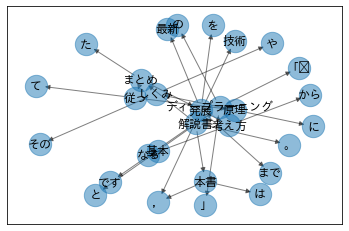

In [17]:
plot_adjency(W0)

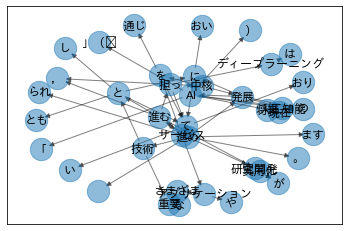

In [18]:
plot_adjency(W1)

(29, 29)


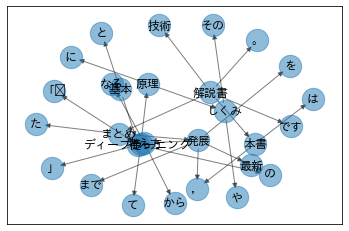

(10, 29)


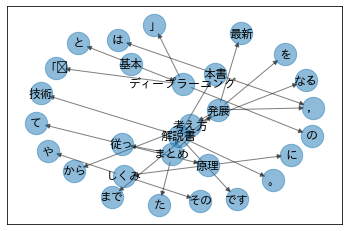

In [19]:
W, le = Adj[0]
print(W.shape)
plot_adjency(W)

_W = summarise_adjency(W)
print(_W.shape)
plot_adjency(_W)

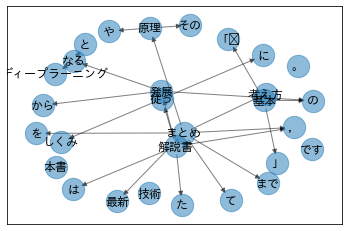

In [20]:
plot_adjency(W.dot(W))

In [21]:
def plot_vector(W: pandas.DataFrame, key):
    if isinstance(key, str):
        tkn_vector = W.loc[[key], :]
    elif isinstance(key, int):
        tkn_vector = W.iloc[[key], :]
    else:
        raise NotImplementedError(f"key [{key}] in plot_vector()")
    indices_cols = numpy.arange(tkn_vector.shape[1])[tkn_vector.sum(axis=0) > 0]
    V = tkn_vector.iloc[:, indices_cols]
    plot_adjency(V)

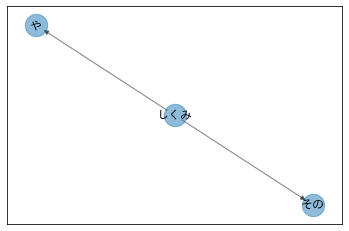

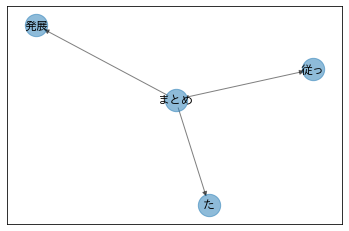

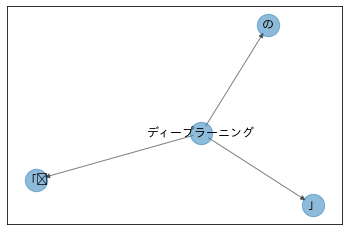

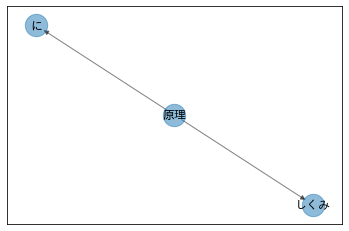

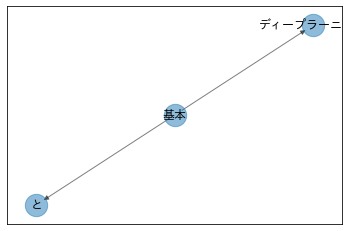

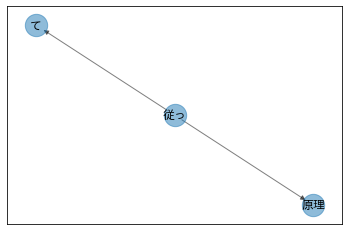

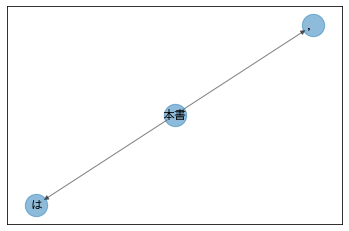

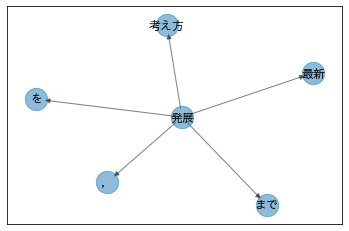

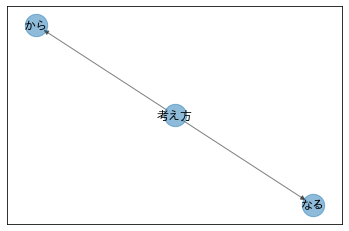

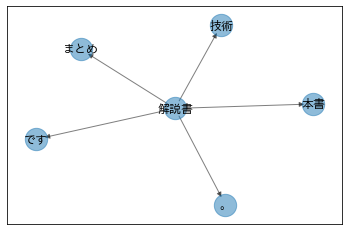

In [22]:
for W, le in Adj:
    _W = summarise_adjency(W)
    if _W.shape[0] <= 0:
        continue
    # print(_W.shape, numpy.linalg.matrix_rank(W), numpy.linalg.matrix_rank(_W))
    for idx in range(len(_W)):
        plot_vector(_W, idx)
        # tkn_vector = _W.iloc[[idx], :]
        # indices_cols = numpy.arange(tkn_vector.shape[1])[tkn_vector.sum(axis=0) > 0]
        # V = tkn_vector.iloc[:, indices_cols]
        # plot_adjency(V)
    break

In [23]:
def merge_adjencies(df_Ws: list):
    for df_W in df_Ws:
        assert isinstance(df_W, pandas.DataFrame), f"{type(df_W)}"

    le = preprocessing.LabelEncoder()
    labels = []
    for df_W in df_Ws:
        labels += list(df_W.columns)
    le.fit(labels)

    n = len(le.classes_)
    W = numpy.zeros((n, n))
    for tkn_r in labels:
        for tkn_c in labels:
            tkn_idx = le.transform([tkn_c])[0]
            head_idx = le.transform([tkn_r])[0]
            if head_idx == tkn_idx:
                continue
            for df_W in df_Ws:
                if tkn_r in df_W.columns and tkn_c in df_W.columns:
                    W[head_idx, tkn_idx] += df_W.loc[tkn_r, tkn_c]
    labels = [le.inverse_transform([idx])[0] for idx in range(n)]
    _df_W = pandas.DataFrame(W, columns=labels, index=labels)
    return _df_W
    

In [24]:
df_Ws = [_df_W for _df_W, _le in Adj]
ctx_W = merge_adjencies(df_Ws)

In [25]:
ctx_W

,\n,\n\n,/,AI,⁠）⁠，,。,「,「⁠,」,」（⁠,...,適用,遭遇,重要,開発,関数,音声,高い,（,）,，
\n,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
\n\n,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
/,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AI,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
⁠）⁠，,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
音声,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
高い,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
（,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
）,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8288 (\N{WORD JOINER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


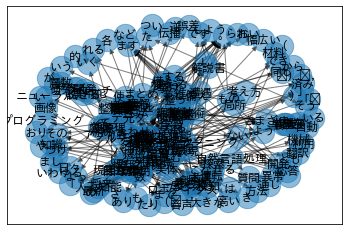

In [26]:
plot_adjency(ctx_W)

In [27]:
ctx_W.index

Index(['\n', '\n\n', '/', 'AI', '⁠）⁠，', '。', '「', '「⁠', '」', '」（⁠',
       ...
       '適用', '遭遇', '重要', '開発', '関数', '音声', '高い', '（', '）', '，'],
      dtype='object', length=196)

In [28]:
indices = ctx_W.sum(axis=1).sort_values(ascending=False).head(10).index
indices


Index(['ディープラーニング', 'こと', 'て', 'に', 'ネットワーク', '問題', 'する', '機械学習', 'を', 'と'], dtype='object')

word: ディープラーニング


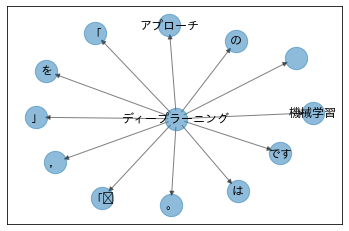

word: こと


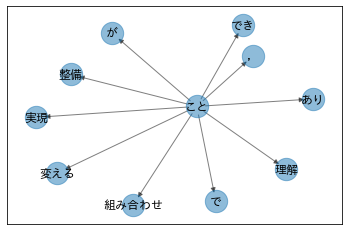

word: て


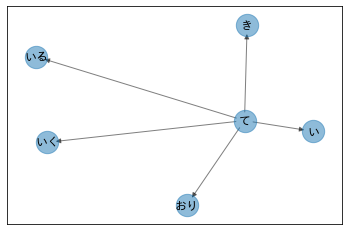

word: に


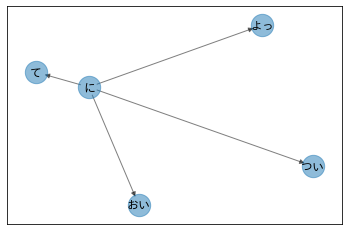

word: ネットワーク


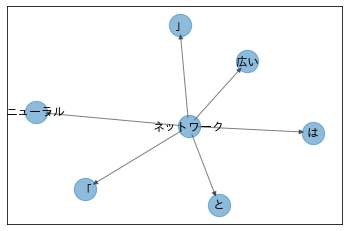

word: 問題


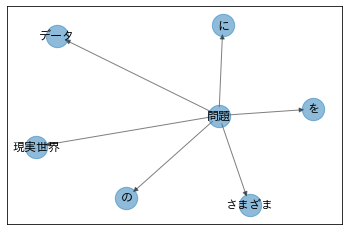

word: する


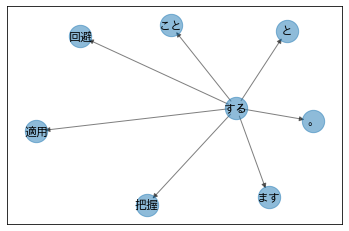

word: 機械学習


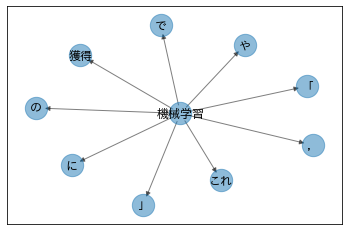

word: を


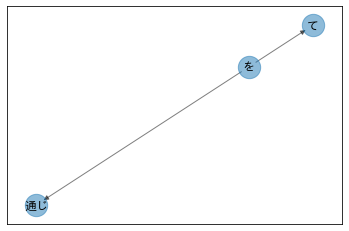

word: と


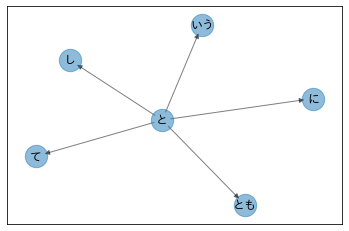

word: しくみ


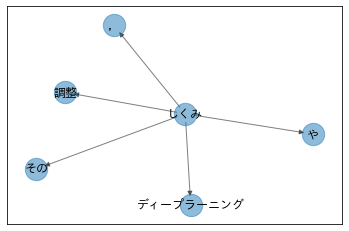

word: モデル


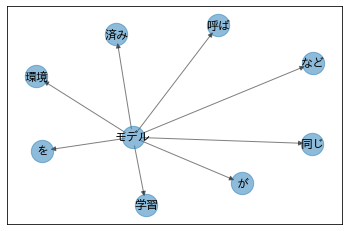

word: 特徴


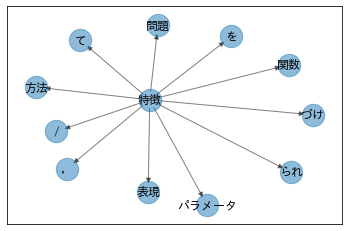

word: 発展


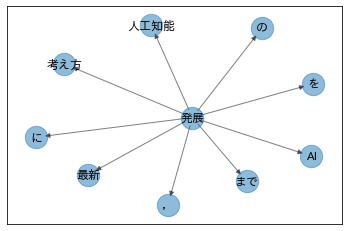

word: 関数


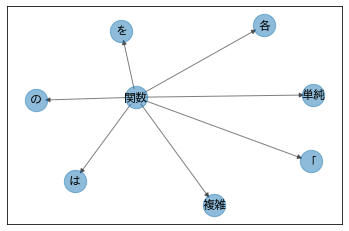

word: 環境


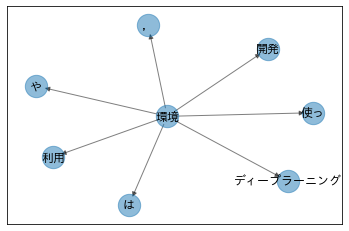

word: 学習


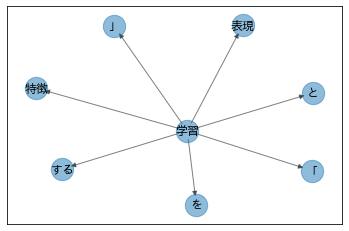

word: これ


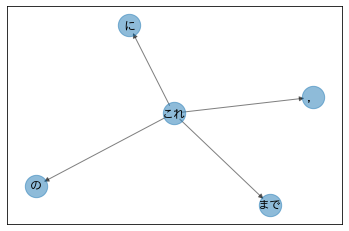

word: パラメータ


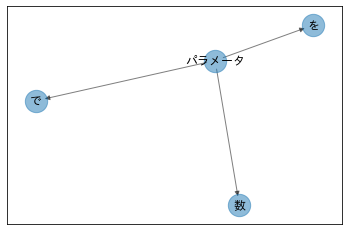

word: さまざま


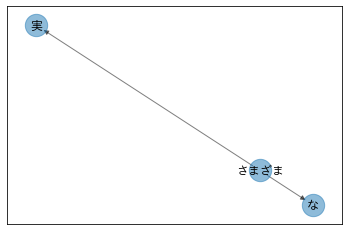

In [29]:
indices = ctx_W.sum(axis=1).sort_values(ascending=False).head(20).index
for k in indices:
    print(f"word: {k}")
    plot_vector(ctx_W, k)

idx: 0
word: ディープラーニング


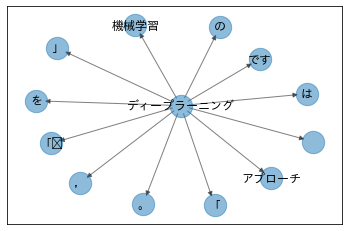

word: こと


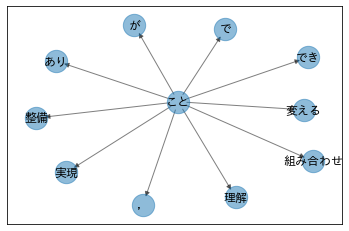

word: て


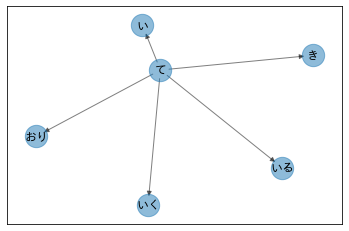

idx: 1
word: ディープラーニング


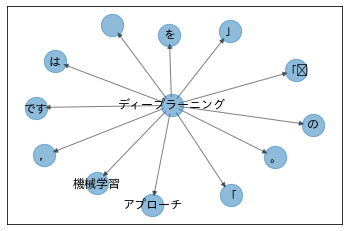

word: こと


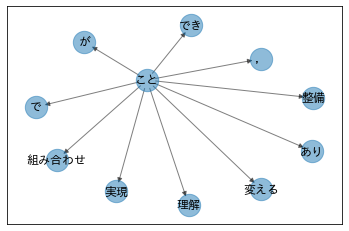

word: て


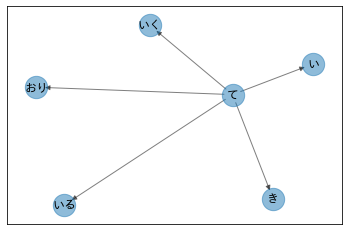

idx: 2
word: ディープラーニング


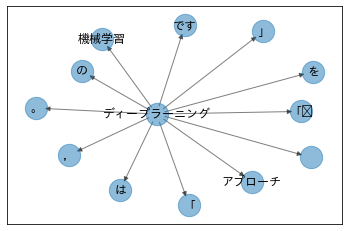

word: こと


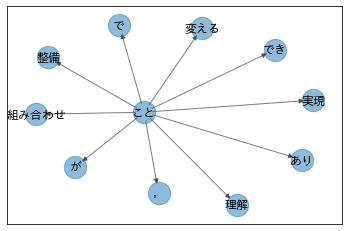

word: て


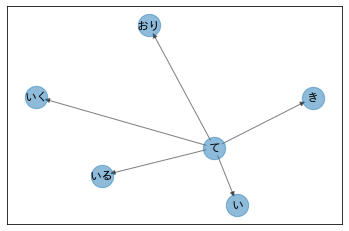

idx: 3
word: ディープラーニング


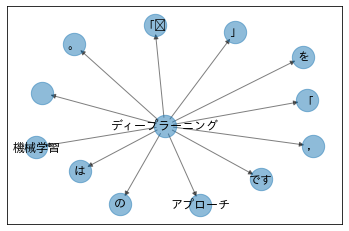

word: こと


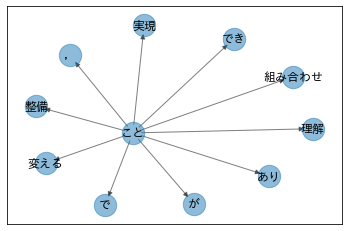

word: て


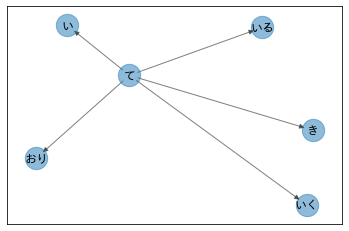

idx: 4
word: ディープラーニング


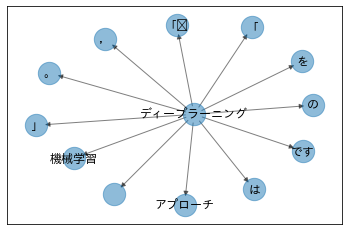

word: こと


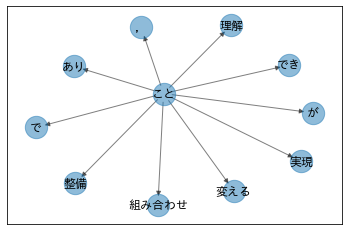

word: て


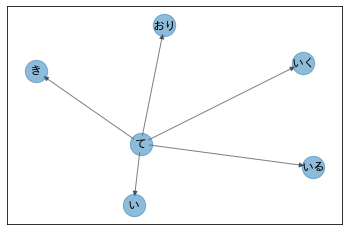

idx: 5
word: ディープラーニング


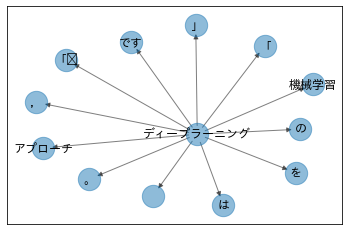

word: こと


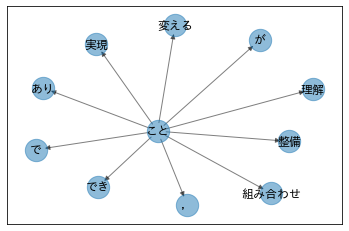

word: て


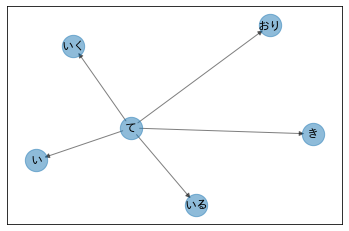

idx: 6
word: ディープラーニング


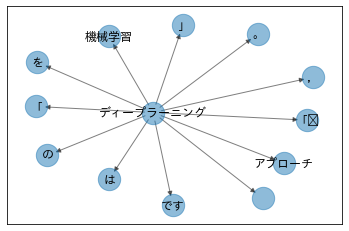

word: こと


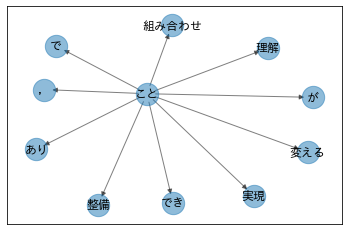

word: て


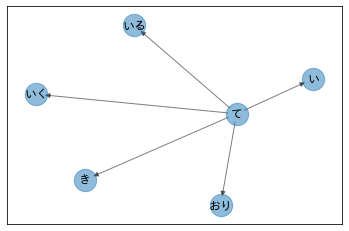

idx: 7
word: ディープラーニング


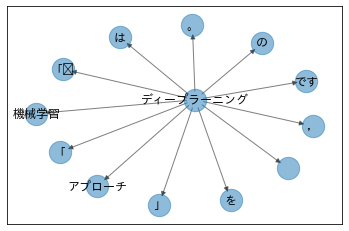

word: こと


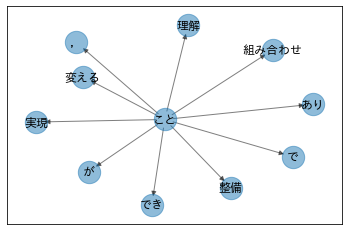

word: て


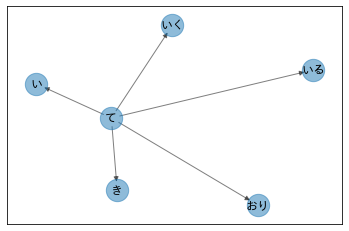

idx: 8
word: ディープラーニング


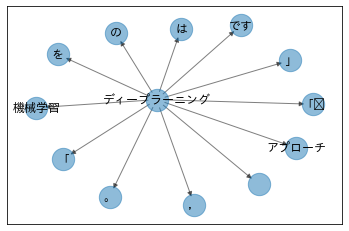

word: こと


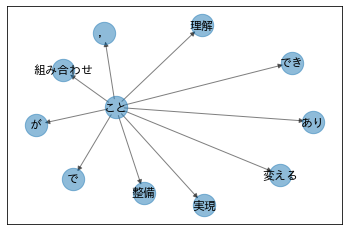

word: て


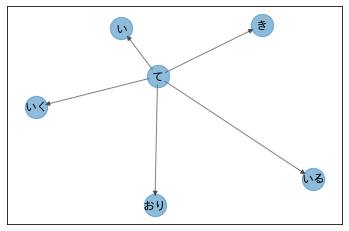

idx: 9
word: ディープラーニング


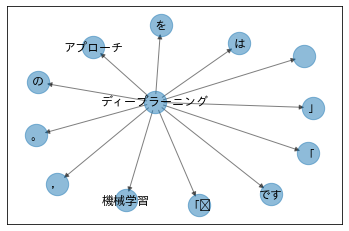

word: こと


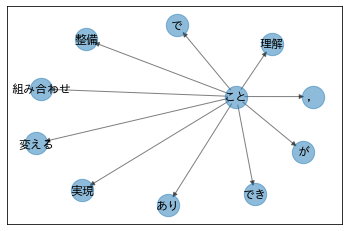

word: て


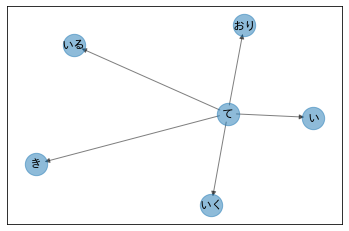

idx: 10
word: ディープラーニング


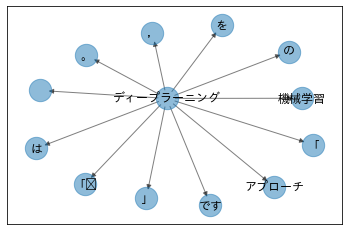

word: こと


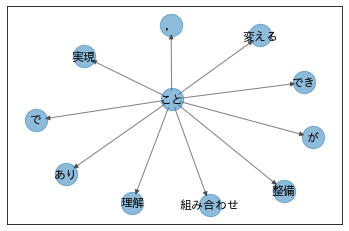

word: て


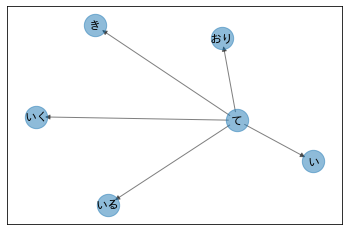

idx: 11
word: ディープラーニング


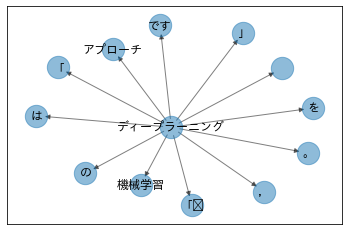

word: こと


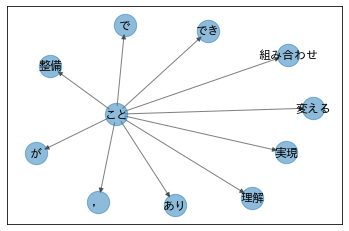

word: て


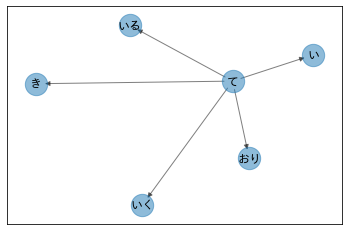

idx: 12
word: ディープラーニング


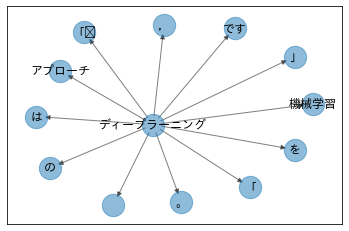

word: こと


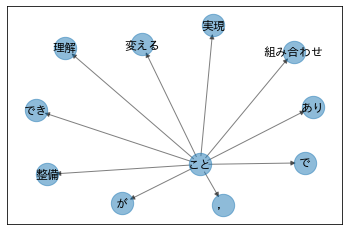

word: て


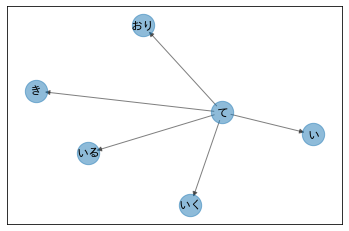

idx: 13
word: ディープラーニング


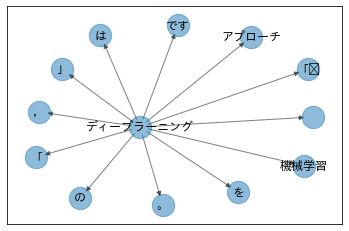

word: こと


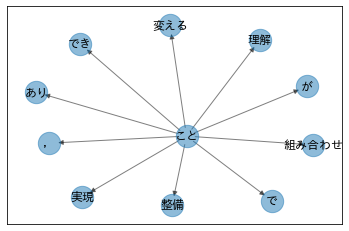

word: て


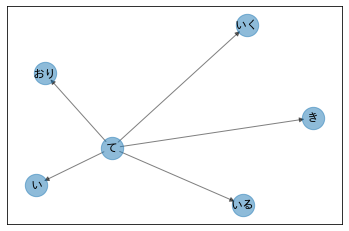

In [30]:
for idx, (W, le) in enumerate(Adj):
    cmn_cols = list(set(W.columns) & set(ctx_W.columns))
    W_ = W.loc[cmn_cols, cmn_cols].dot(ctx_W.loc[cmn_cols, cmn_cols])
    print("idx:", idx)
    # plot_adjency(summarise_adjency(W_))

    indices = ctx_W.sum(axis=1).sort_values(ascending=False).head(3).index
    for k in indices:
        print(f"word: {k}")
        plot_vector(ctx_W, k)

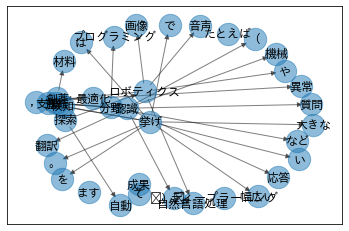

In [31]:
W, le = Adj[2]
cmn_cols = list(set(W.columns) & set(ctx_W.columns))
W_ = W
W_ = W_.loc[cmn_cols, cmn_cols].dot(ctx_W.loc[cmn_cols, cmn_cols])
plot_adjency(summarise_adjency(W_))

In [32]:
summarise_adjency(W_)

,など,。,音声,（,機械,い,応答,て,支援,たとえば,...,ます,創薬,で,挙げ,翻訳,分野,成果,自然言語処理,や,画像
支援,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
検知,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ロボティクス,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.0,1.0
最適化,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
認識,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
運転,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
探索,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
創薬,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
挙げ,0.0,117.0,0.0,0.0,0.0,275.0,0.0,0.0,1.0,0.0,...,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
分野,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
df_W = W_.copy()
threshold = 1
indices = numpy.arange(df_W.shape[0])[df_W.sum(axis=1) > threshold]
# _W = df_W.iloc[indices, indices]
# _W
_W = df_W.iloc[indices]
__W = _W.T
__W[__W != 0]

,支援,検知,ロボティクス,最適化,認識,運転,探索,創薬,挙げ,分野,成果
など,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN
。,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,117.0,NaN,NaN
音声,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
（,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
機械,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
い,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,275.0,NaN,NaN
応答,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
て,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,132.0
支援,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
たとえば,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
text2 = """
ディープラーニングでは、複雑なニューラルネットワーク上で膨大な数の数値が駆け巡っています。コンピュータはそれらの数値を個別に扱うこともできます。
しかし、そのままではニューラルネットワーク内での計算を理論化できませんし、何よりもニューラルネットワークごとに扱う数値に関する何かしらの共通認識がなければ、ほかの人間がプログラムのコードを読んでも何が書いてあるのか分からず、技術の応用や発展につなげにくくなります。そこで使われるようになった数学的概念が「テンソル」でした。
テンソルという概念は数学的に理解するには難解なものですが、私たちから見る分には「沢山の数値の集まり」として見えます。
"""

text2 = """
自己教師ありディープラーニング：現在のディープラーニングモデルには、大量のラベル付けされた学習データが不可欠である。自己教師あり学習はラベル付けをデータ自体から学習するので、大量のラベル付き学習データが不要となる。
ハイブリッドモデル：第2次AIブームで流行したルールベースAIとディープラーニングを併用するハイブリッドモデルは、非ハイブリッドモデルを凌駕する性能を発揮すると期待されている。
システム2のディープラーニング：行動経済学で言うところの「システム2」の認知活動を実行するAIが実現すれば、AIがより多様な問題を解決できるようになる。
神経科学にもとづくディープラーニング：汎用人工知能（Artificial General Intelligence：AGI）の実現には、人工知能工学と神経科学の連携・融合が有効であると期待される。
以上の5つのトレンドは、6月14日にNEDOが発表した「人工知能（AI）技術分野における大局的な研究開発のアクションプラン（AIアクションプラン）」および6月14日に開催されたAIアクションプラン・シンポジウムでの討論内容と一部重複しています。具体的には、「自己教師ありディープラーニング」は「スモールデータ駆動」と、「ハイブリッドモデル」は「2階建て脳」、「システム2のディープラーニング」は「2階建て脳におけるシステム2」と重複します。このように、次世代型AIを実現するための技術研究は世界同時進行的と言えます。
"""

text2 = re.sub(r"[¥s]+", "", text2)
print(text2)


自己教師ありディープラーニング：現在のディープラーニングモデルには、大量のラベル付けされた学習データが不可欠である。自己教師あり学習はラベル付けをデータ自体から学習するので、大量のラベル付き学習データが不要となる。
ハイブリッドモデル：第2次AIブームで流行したルールベースAIとディープラーニングを併用するハイブリッドモデルは、非ハイブリッドモデルを凌駕する性能を発揮すると期待されている。
システム2のディープラーニング：行動経済学で言うところの「システム2」の認知活動を実行するAIが実現すれば、AIがより多様な問題を解決できるようになる。
神経科学にもとづくディープラーニング：汎用人工知能（Artificial General Intelligence：AGI）の実現には、人工知能工学と神経科学の連携・融合が有効であると期待される。
以上の5つのトレンドは、6月14日にNEDOが発表した「人工知能（AI）技術分野における大局的な研究開発のアクションプラン（AIアクションプラン）」および6月14日に開催されたAIアクションプラン・シンポジウムでの討論内容と一部重複しています。具体的には、「自己教師ありディープラーニング」は「スモールデータ駆動」と、「ハイブリッドモデル」は「2階建て脳」、「システム2のディープラーニング」は「2階建て脳におけるシステム2」と重複します。このように、次世代型AIを実現するための技術研究は世界同時進行的と言えます。



In [35]:
doc2 = nlp(text2)

Adj2 = []
for sent in doc2.sents:
    W, le = get_adjency(sent)
    Adj2.append((W, le))


In [36]:
len(Adj2)

10

In [37]:
ctx_W2 = merge_adjencies([W for W, le in Adj2])
ctx_W2

,\n,14,2,5,6,AGI,AI,Artificial,General,Intelligence,...,連携,進行,重複,開催,階,非,駆動,（,）,：
\n,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
非,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
駆動,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
（,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
）,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
ctx_W2.index

Index(['\n', '14', '2', '5', '6', 'AGI', 'AI', 'Artificial', 'General',
       'Intelligence',
       ...
       '連携', '進行', '重複', '開催', '階', '非', '駆動', '（', '）', '：'],
      dtype='object', length=130)

In [39]:
token = "ディープラーニング"

assert token in ctx_W.index
assert token in ctx_W2.index


In [40]:
commons = list(set(ctx_W2.columns) & set(ctx_W.index))
commons

['あり',
 'さ',
 '。',
 'モデル',
 '（',
 '性能',
 'い',
 'て',
 'から',
 '解決',
 'と',
 '技術',
 '学習',
 '）',
 'が',
 '問題',
 '現在',
 '実現',
 '」',
 'データ',
 'の',
 '人工知能',
 'いる',
 '「',
 'ディープラーニング',
 'を',
 '大量',
 'は',
 'ます',
 'する',
 '的',
 'AI',
 'で',
 '\n',
 '分野',
 'し',
 'た',
 'よう',
 'に',
 'れる',
 'ルール',
 '研究開発',
 'な',
 'なる']

In [41]:
ctx_W_merged = merge_adjencies(df_Ws=[ctx_W, ctx_W2])
ctx_W_merged

,\n,\n\n,/,14,2,5,6,AGI,AI,Artificial,...,関数,階,非,音声,駆動,高い,（,）,，,：
\n,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
\n\n,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
/,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
高い,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
（,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
）,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
，,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


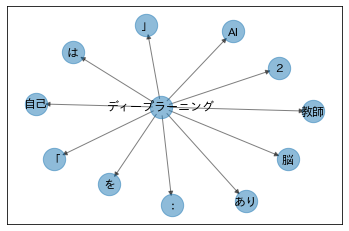

In [42]:
plot_vector(ctx_W2, key="ディープラーニング")

/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8288 (\N{WORD JOINER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


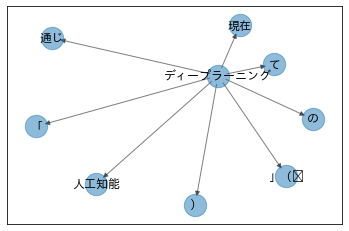

In [43]:
ctx_W_connected = ctx_W2.loc[:, commons].dot(ctx_W.loc[commons, :])
plot_vector(ctx_W_connected, key="ディープラーニング")

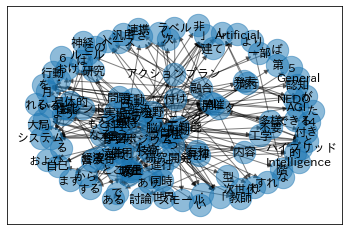

In [44]:
plot_adjency(ctx_W2)

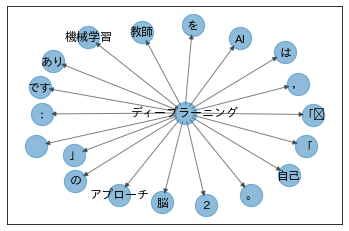

In [45]:
plot_vector(ctx_W_merged, key="ディープラーニング") 

In [46]:
ctx_W_merged["ディープラーニング"].sum()

436.0